# Exercise 3 - Sort distances for K-nearest-neighbours classifier

## First, run the below cell in order to install all the relevant libraries.

In [12]:
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install scipy

## What you should implement

Below is given the bubble-sort implementation of the sorting function we want. It should return the K closest distances in sorted order.

但其实实际上这个东西是selection sort

In [40]:
def k_nearest_bubble_sort(array, K):
    size = len(array)
    for i in range(size):
        min_idx = i
        for j in range(i+1, size):
            if array[j] < array[min_idx]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]
    return array[:K]

In [6]:
def k_nearest_mergesort(array, K):
    # TODO: Implement mergesort and return the K smallest values
    return mergesort(array)[:K]
        

def merge(a, b):
    i = 0
    j = 0
    result = []
    while i < len(a) and j < len(b):
        if a[i] < b[j]:
            result.append(a[i])
            i += 1
        else:
            result.append(b[j])
            j += 1
    if i < len(a):
        for k in range(i ,len(a)):
            result.append(a[k])
    else:
        for k in range(j, len(b)):
            result.append(b[k])
    return result

def mergesort(array):
    mid = len(array) // 2
    if mid == 0:
        return array
    return merge(mergesort(array[:mid]), mergesort(array[mid:]))

In [48]:
def k_nearest_insertionsort(array, K):
    # TODO: Implement insertion sort and return the K smallest values
    for i in range(1, len(array)):
        for j in range(i, 0, -1):
            if array[j] < array[j-1]:
                array[j], array[j-1] = array[j-1], array[j]
    return array[:K]

### Compare the speed

Once we have implemented the above and made sure it is correct, we can see the difference in speed for ourselves.

In [49]:
import random

# Change these parameters and see how the performance changes.
# Can you get formulas for the complexity of your algorithms?
K = 7
max_dist = 10000
num_points = 1000
array = [random.randint(0, max_dist) for i in range(num_points)]

%timeit k_nearest_bubble_sort(array, K)
%timeit k_nearest_mergesort(array, K)
# We only copy the array here because timeit calls this function several times
%timeit k_nearest_insertionsort(array.copy(), K)

13 ms ± 357 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.25 ms ± 40.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
16.5 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Dividing space into partitions

We will use our efficient implementation of sorting to create a K-nearest-neighbour (KNN) classifier. We first generate some data that represents measurements of the weight and size of various apples. Each apple comes from one of three different types - red, green, yellow. We will want to guess a type for the grid of gray points shown below.

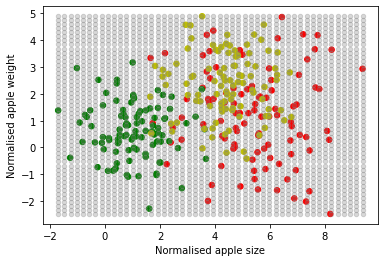

In [17]:
from lab3_helpers import generate_data, plot_grid

# You can change these parameters to generate new datasets
seed = 0
num_classes = 3
num_points_per_class = 100

data, labels = generate_data(num_classes, num_points_per_class, seed)
colours = ['r', 'g', 'y', 'b', 'teal']
x, y = data[:, 0], data[:, 1]

plot_grid(x, y, colours, labels)

Below we use the provided `knn` function to do just that. The KNN classifier finds the K closest points to our point of interest and uses majority voting to decide what label to assign it. That is, if K=3 and we have the three closest point being \[red, red, blue\], then KNN says that this apple is red.

It currently uses the slow `k_nearest_bubble_sort` sorting algorithm. You can run the cell and see how long it takes. You should replace it with your implementation of `merge_sort` and `insertion_sort` and compare the speed.

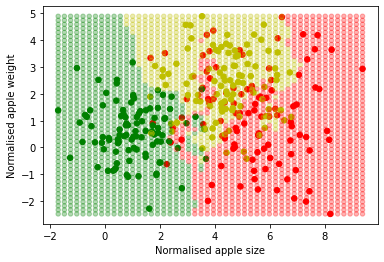

In [20]:
from lab3_helpers import get_grid, knn

# You can change this to see how it affects the partition of the space
K = 7

new_data = get_grid(x, y)

# TODO: replace k_nearest_bubble_sort with your implementations
preds = knn(data, labels, new_data, K, 10, sort_function=k_nearest_insertionsort)

plot_grid(x, y, colours, labels, preds)

## Recognising hand-written digits

We first load a dataset of digits. This will take a few minutes to load the first time you run this cell.

In [23]:
from lab3_helpers import get_image_data, knn, plot_images

X_train, X_test, y_train, y_test = get_image_data(num_train=3000, num_test=40)

Let's see what some of these digits look like.

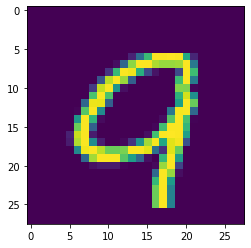

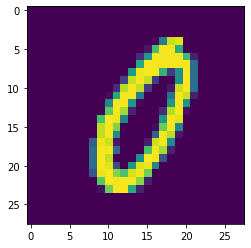

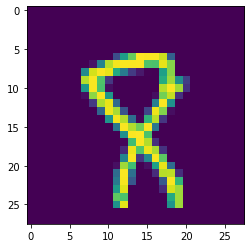

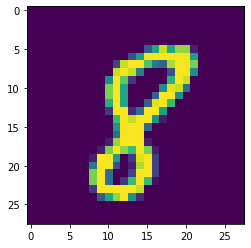

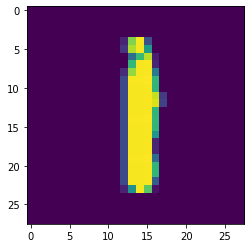

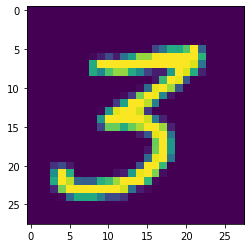

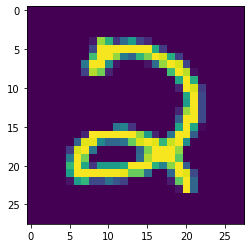

In [24]:
plot_images(X_test, num_images=7)

We will concatenate all the pixel values for a single image into one 28x28=784 long vector. We will use our KNN classifier again and this time the distance will be the Euclidean distance between those 784-dimensional vectors.

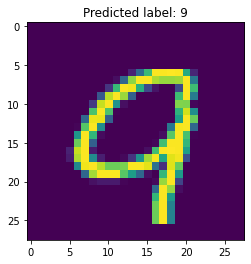

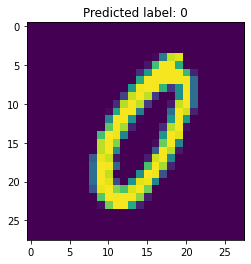

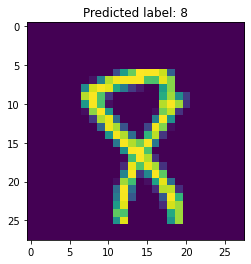

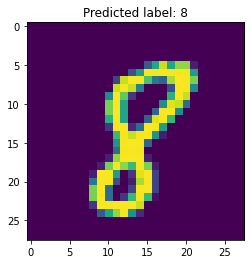

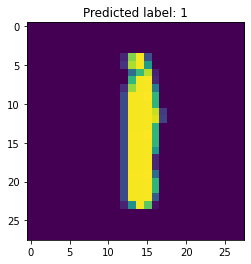

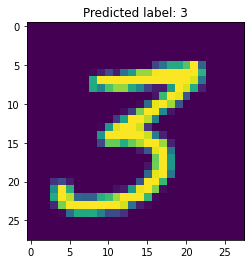

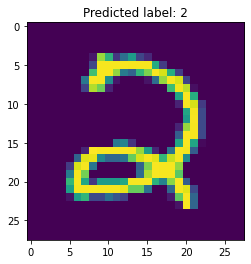

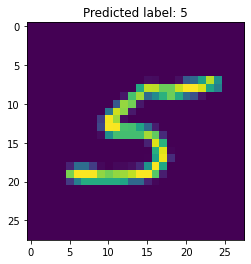

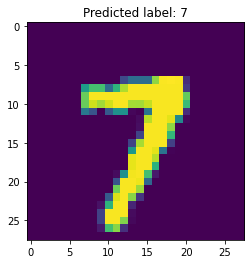

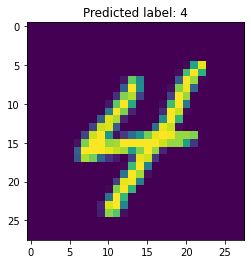

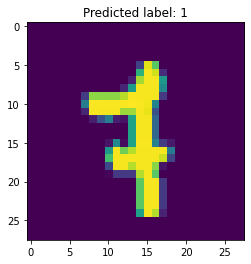

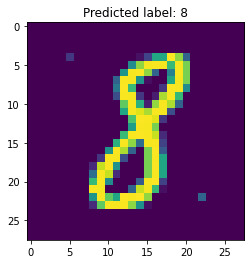

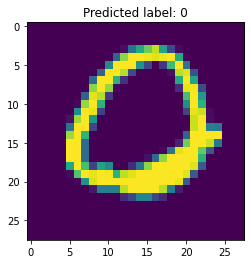

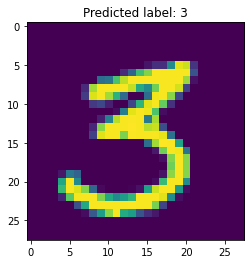

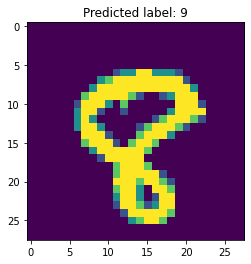

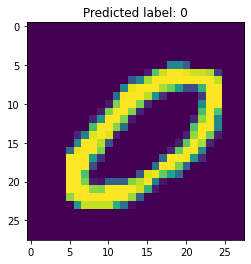

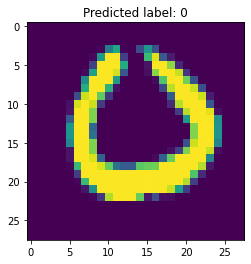

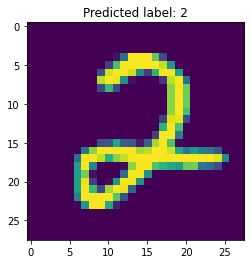

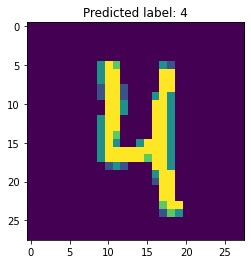

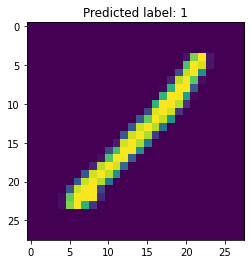

In [33]:
# You can experiment with this and find the values that makes the best predictions
K = 5

# TODO: Replace with your other sorting algorithm functions
digit_predictions = knn(X_train, y_train, X_test, K, 10, k_nearest_mergesort)

plot_images(X_test, num_images=20, digit_predictions=digit_predictions)